In [1]:
from solution import ErrorRate, split_dataset, random_projections

In [2]:
import matplotlib.pyplot as plt
import numpy as np

banknote = np.genfromtxt('data_banknote_authentication.txt', delimiter=',')

In [3]:
train, val, test = split_dataset(banknote)

er = ErrorRate(np.array(train)[:,:-1], np.array(train)[:,-1], np.array(val)[:,:-1], np.array(val)[:,-1])

hyperparam = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 3, 10, 20]

hard_p_err = []
soft_p_err = []

for val in hyperparam:
    hard_p_err.append(er.hard_parzen(val))
    soft_p_err.append(er.soft_parzen(val))

In [4]:
hard_p_err

[0.5072992700729927,
 0.5036496350364964,
 0.48175182481751827,
 0.4124087591240876,
 0.29927007299270075,
 0.21897810218978103,
 0.025547445255474453,
 0.014598540145985401,
 0.26277372262773724,
 0.3613138686131387]

In [5]:
soft_p_err

[0.21897810218978103,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0072992700729927005,
 0.01824817518248175,
 0.3175182481751825,
 0.4233576642335766]

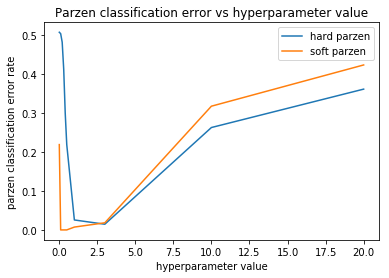

In [6]:
# Q5
plt.plot(hyperparam, hard_p_err, label = "hard parzen")
plt.plot(hyperparam, soft_p_err, label = "soft parzen")
plt.xlabel('hyperparameter value')
plt.ylabel('parzen classification error rate')
plt.title('Parzen classification error vs hyperparameter value')
plt.legend()
plt.show()

# Q5

As seen above, a plot has been made with two lines. The blue line represents the error of the Hard Parzen classifier with the corresponding value for h, thus the distance in which points are considered to predict new data points seen. The orange line represents the error of the Soft Parzen classifier with the corresponding value for $\sigma$, the hyperparamter which attributes the proportional weight for a point based how far this point is from the new point which we wish to classify. Initially, these two hyperparameter seem somewhat disjoint with potentially little common trend. However, by plotting the graph with both of these lines side by side, we are able to observe that both have a similar trend when it comes to performance and the value of each respective hyperparameter. With the smallest value for each hyperparameter, both methods seem to not classify quite correctly points. Although, Soft Parzen seems to classify quite well compared to Hard Parzen. Next, for the lower values of the hyperparameters, thus 0.1 - 05, Soft Parzen seems to classify all points correctly while Hard Parzen struggles up until the last few values of this subset. For the next two values, 1 & 3, both seem to classify with an approximately similar degree of correctness. Finally for the last two values, Hard Parzen seems to classify better than Soft Parzen by about 10%. While the difference does seem steep, the two method seem to follow a similar trend with the exception that Soft Parzen classifies much better for smaller values of $\sigma$.

# Q7

To analyze the running time complexity of both Hard Parzen and Soft Parzen, we must analyze the algorithm of both these algorithms. Firstly, the time complexity for training in both cases is trivially proportional to the number of data points, say N. Next, in the case of Hard Parzen, for every new point we would like to predict, we must check with every training data point the distance. This distance will determine whether the data point will be considered in the final vote to predict the new data point. As such, since we much check every training data point, we get a running time complexity of $O(N)$ for the prediction. As for Soft Parzen, as per the definition, we must check every training point's distance to the new data point to weigh the traing data set to check the weighted average of the predicted new data point. In this algorithm as well, we must itterate through the entire dataset for new data points. Thus the running time complexity for Soft Parzen is $O(N)$. Thanks to our analyze, we now clearly see that both algorithms run with the same running time complexity of $O(N)$.

As for the impact of the values of the hyperparameter, it seems to be negligible for the running time complexity. Since the hyperparameters in these algorithms are used as value checks, the core of the algorithm remains unchanged. In the Hard Parzen algorithm, the hyperparameter h is used to determine which points will be used to points will be considered. However, the algorithm must still iterate through all points. In the Soft Parzen algorithm, the hyperparameter $\sigma$ is used in the RBF kernel to determine the weights of points in relation to the distance to the predicted point. However, this value has no real impact on the running time of the algorithm. As such, in both cases, the running time complexity remains the same at $O(N)$, regardless of the value of the hyperparameters. It should however, be noted that there might be minor variations due to the fact that a smaller value of h will result in fewer numbers in the vector which will be used to find the most common class. This small caveat is however very small when comparing to big $O$ notations. 

In [7]:
def get_test_projection_error(banknote):
    A = np.random.normal(0, 1, size=(4, 2))

    hyperparam = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 3, 10, 20]

    hard_p_val = np.empty((0,10), float)
    soft_p_val = np.empty((0,10), float)

    for i in range(500):
        A = np.random.normal(0, 1, size=(4, 2))
        proj_banknote = np.array(random_projections(banknote[:,:-1], A))

        proj_banknote = np.append(proj_banknote, np.transpose([banknote[:,-1]]), axis=1)

        train, val, test = split_dataset(proj_banknote)

        er = ErrorRate(np.array(train)[:,:-1], np.array(train)[:,-1], np.array(val)[:,:-1], np.array(val)[:,-1])

        hard_p_err = []
        soft_p_err = []

        for val in hyperparam:
            hard_p_err.append(er.hard_parzen(val))
            soft_p_err.append(er.soft_parzen(val))

        hard_p_val = np.append(hard_p_val, [hard_p_err], axis=0)
        soft_p_val = np.append(soft_p_val, [soft_p_err], axis=0)
        
    return (hard_p_val, soft_p_val)

In [8]:
hard_p_val, soft_p_val = get_test_projection_error(banknote)

In [9]:
h_mean = np.mean(hard_p_val, axis=0)
h_std = np.std(hard_p_val, axis=0) * 0.2
s_mean = np.mean(soft_p_val, axis=0)
s_std = np.std(soft_p_val, axis=0) * 0.2

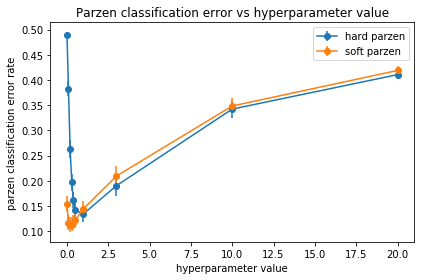

In [11]:
# Q9
plt.errorbar(hyperparam, h_mean, yerr=h_std, fmt='-o', label = "hard parzen")
plt.errorbar(hyperparam, s_mean, yerr=s_std, fmt='-o', label = "soft parzen")
plt.xlabel('hyperparameter value')
plt.ylabel('parzen classification error rate')
plt.title('Parzen classification error vs hyperparameter value')
plt.legend()
plt.tight_layout()
plt.show()

# Q9

While the errors at each value of hyperparameter are not quite the same as in the previous graph, the general trend seems to suggest that it does follow the same general idea. With very small values for hyperparameters, Soft Parzen seems to perform better than Hard Parzen. With the next group comes a small difference than previously. Since values were randomly projected over a large number of times, the error rate for Soft Parzen is no longer precisely 0. Next, the trend seems to follow that both methods perform worse and finally both seem have the same error rates in the last values for the hyperparamters.